# Lab 1: Image and Video Manipulation with OpenCV, NumPy, and Matplotlib

## Task 1: Load and Display an Image

In [12]:
import cv2
import matplotlib.pyplot as plt

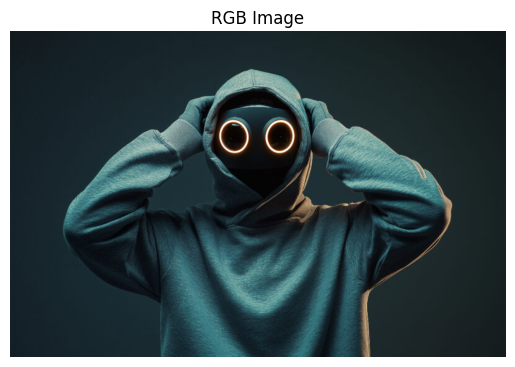

In [13]:
# Load the image
image = cv2.imread('image.jpg')  # Replace 'image.jpg' with your image path

# Display image using OpenCV
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert from BGR to RGB and display using Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('RGB Image')
plt.show()


## Task 2: Resize and Crop an Image

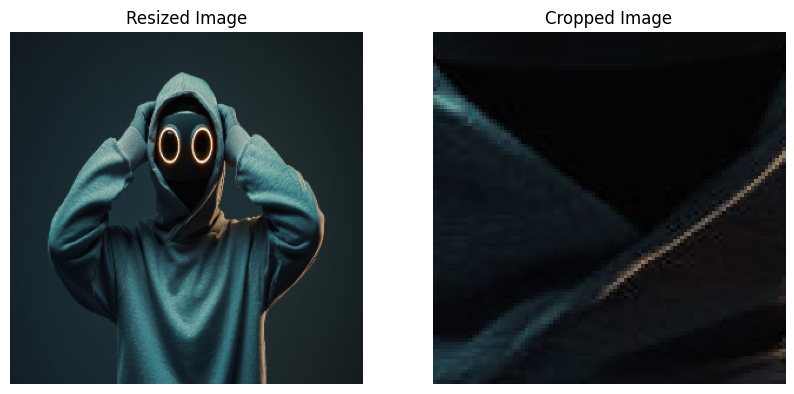

In [14]:
# Resize the image to 300x300 pixels
resized_image = cv2.resize(image, (300, 300))

# Crop a centered portion (e.g., 100x100 pixels from center)
height, width, _ = image.shape
center_x, center_y = width // 2, height // 2
cropped_image = image[center_y-50:center_y+50, center_x-50:center_x+50]

# Display resized and cropped images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')
plt.show()

## Task 3: Convert an Image to Different Color Spaces

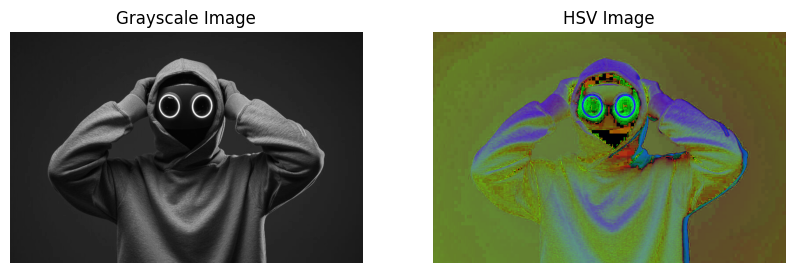

In [15]:
# Convert to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display grayscale and HSV images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hsv_image)
plt.title('HSV Image')
plt.axis('off')
plt.show()

## Task 4: Modify Image Pixels using NumPy

In [16]:
# Print pixel value at (100, 100)
pixel_value = image[100, 100]
print(f'Pixel value at (100, 100): {pixel_value}')

# Change the pixel value to green
image[100, 100] = [0, 255, 0]
cv2.imshow('Modified Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Pixel value at (100, 100): [40 34 21]


## Task 5: Extract and Modify Color Channels

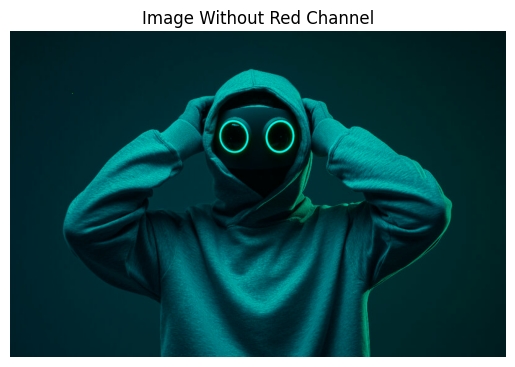

In [17]:
# Split the image into B, G, R channels
b, g, r = cv2.split(image)

# Set the red channel to zero
image_no_red = cv2.merge([b, g, r*0])

# Display the modified image
plt.imshow(cv2.cvtColor(image_no_red, cv2.COLOR_BGR2RGB))
plt.title('Image Without Red Channel')
plt.axis('off')
plt.show()

## Task 6: Create a Binary Mask

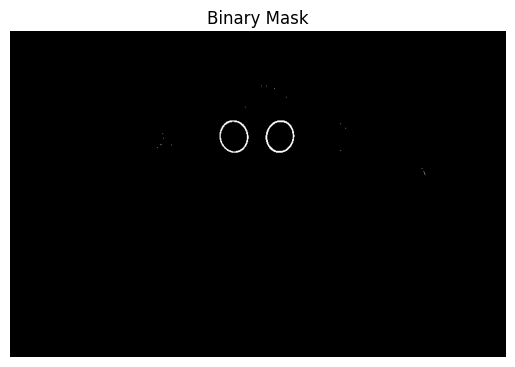

In [18]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a binary mask
_, binary_mask = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

# Display the binary mask
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')
plt.axis('off')
plt.show()

## Task 7: Flip and Rotate an Image

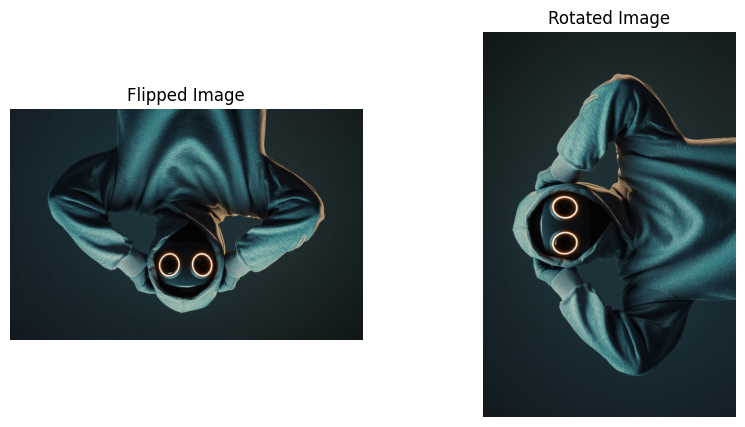

In [19]:
# Flip the image vertically
flipped_image = cv2.flip(image, 0)

# Rotate the image 90 degrees counterclockwise
rotated_image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Display flipped and rotated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## Task 8: Adjust Brightness and Contrast

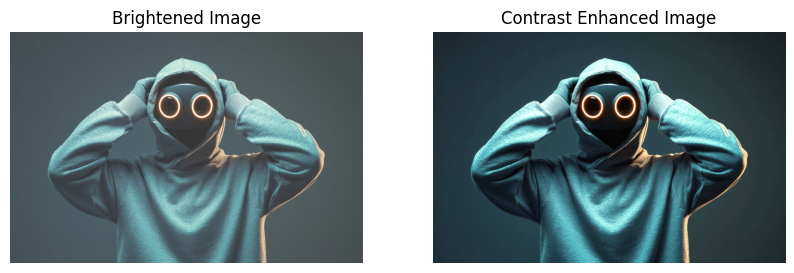

In [20]:
# Increase brightness by adding 50 to all pixel values
bright_image = cv2.add(image, 50)

# Increase contrast by multiplying pixel values by 1.5
contrast_image = cv2.convertScaleAbs(image, alpha=1.5, beta=0)

# Display brightness and contrast-adjusted images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
plt.title('Contrast Enhanced Image')
plt.axis('off')
plt.show()

## Task 9: Capture Video from Webcam

In [21]:
# Capture video from webcam and display live stream
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('Webcam Feed', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()


## Task 10: Save a Video to File

In [22]:
# Capture and save video to file
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)
    cv2.imshow('Recording...', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to stop recording
        break

cap.release()
out.release()
cv2.destroyAllWindows()

## Task 11: Draw Shapes and Text on a Video Feed

In [23]:
# Draw rectangle and text on live video feed
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Draw a rectangle
    cv2.rectangle(frame, (50, 50), (200, 200), (255, 0, 0), 2)
    # Add text
    cv2.putText(frame, 'Region of Interest', (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.imshow('Video Feed', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
        break

cap.release()
cv2.destroyAllWindows()